# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

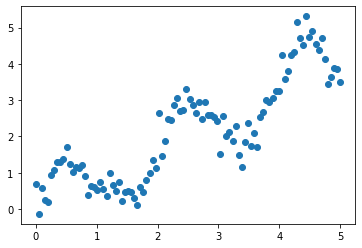

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5385163180385354


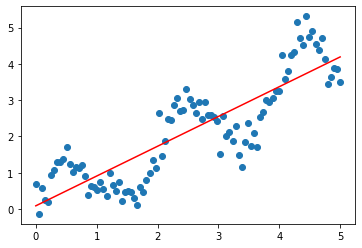

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

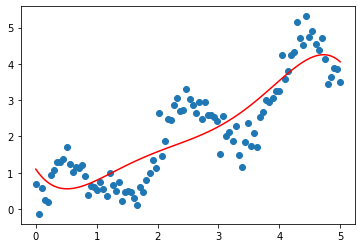

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.48265551  3.59250613 -1.78239094  0.39737962 -0.03200168]
interception:  1.0998051799132131


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.09980518, 0.98335512, 0.88389046, 0.80012501, 0.73083207,
       0.67484323, 0.63104708, 0.59838794, 0.57586463, 0.56252917,
       0.55748555, 0.55988845, 0.56894198, 0.58389843, 0.60405699,
       0.6287625 , 0.65740419, 0.6894144 , 0.72426735, 0.76147785,
       0.80060005, 0.84122617, 0.88298524, 0.92554186, 0.96859491,
       1.0118763 , 1.05514969, 1.09820927, 1.14087846, 1.18300866,
       1.22447799, 1.26519002, 1.30507254, 1.34407623, 1.38217348,
       1.41935707, 1.45563894, 1.49104889, 1.52563337, 1.55945418,
       1.59258722, 1.62512123, 1.65715653, 1.68880373, 1.72018252,
       1.75142037, 1.78265128, 1.81401451, 1.84565332, 1.87771374,
       1.91034324, 1.94368955, 1.97789931, 2.0131169 , 2.04948311,
       2.08713389, 2.12619913, 2.16680135, 2.20905444, 2.25306244,
       2.29891824, 2.34670232, 2.39648151, 2.44830772, 2.50221665,
       2.55822658, 2.61633707, 2.67652769, 2.73875681, 2.80296027,
       2.86905017, 2.9369136 , 3.00641134, 3.07737665, 3.14961

In [15]:
regr_poly.predict(X_poly)

array([1.09980518, 0.98335512, 0.88389046, 0.80012501, 0.73083207,
       0.67484323, 0.63104708, 0.59838794, 0.57586463, 0.56252917,
       0.55748555, 0.55988845, 0.56894198, 0.58389843, 0.60405699,
       0.6287625 , 0.65740419, 0.6894144 , 0.72426735, 0.76147785,
       0.80060005, 0.84122617, 0.88298524, 0.92554186, 0.96859491,
       1.0118763 , 1.05514969, 1.09820927, 1.14087846, 1.18300866,
       1.22447799, 1.26519002, 1.30507254, 1.34407623, 1.38217348,
       1.41935707, 1.45563894, 1.49104889, 1.52563337, 1.55945418,
       1.59258722, 1.62512123, 1.65715653, 1.68880373, 1.72018252,
       1.75142037, 1.78265128, 1.81401451, 1.84565332, 1.87771374,
       1.91034324, 1.94368955, 1.97789931, 2.0131169 , 2.04948311,
       2.08713389, 2.12619913, 2.16680135, 2.20905444, 2.25306244,
       2.29891824, 2.34670232, 2.39648151, 2.44830772, 2.50221665,
       2.55822658, 2.61633707, 2.67652769, 2.73875681, 2.80296027,
       2.86905017, 2.9369136 , 3.00641134, 3.07737665, 3.14961

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

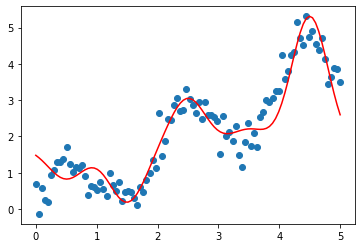

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.86511468 -1.51086153  1.35826484  0.49286018  3.61338257]
interception:  1.696801369818112


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

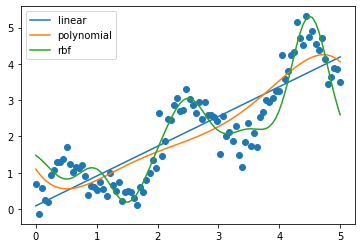

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5385163180385354


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4703269438199254


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23913046609870758
